# Learning Classifiers from Scratch

## Model Source

The goal of this notebook is to quickly and succinctly provide an overview of Learning Classifier Systems and to build a very basic model from scratch in python. The idea is to follow a similar process of that found in "Neural Networks from Scratch in Python" by Harrison Kinsley and Daniel Kukiela, although in a much shorter manner than the 650+ pages of their book.

The initial, basic learning classifier system model taken from Dr. Ryan Urbanowicz's "Learning Classifier Systems in a Nutshell" video on YouTube found here: https://youtu.be/CRge_cZ2cJc?si=1CM2osKW7CptJ-DM. It is highly recommended to watch this 12-minute video before proceeding further. A much deeper dive by Dr. Urbanowicz can be found in his book "Introduction to Learning Classifier Systems".

This video description of an LCS is the simplest and most digestable that has been found while also staying complete in terms of LCS operation. Additionally, some psuedo code snippets have been taken from Dr. Martin Butz's book "Rule-Based Evolutionary Online Learning Systems" and his algorithmic description of XCS.

### Step 0: The Problem at Hand and Knowledge Priming

Learning Classifier Systems are often introduced using relatively simple, but representative toy problems to showcase their operation. The most common of which is the n-bit multiplexer problem, which will be used here as well. The n-bit multiplexer problem tasks the machine learner to find the relationship between a binary string of n-bits and a binary classification of either 0 or 1. However, the relationship between the n-bits and the classification is non-trivial. The n-bit string is comprised of address bits and register bits. The address bits point to the register bits and the value of the bit being pointed at is the classification of that instance. This means that there is a rather complex relationship between the n-bit string and the classification. This relationship is most readily visualized by the diagram below taken from "Introduction to Learning Classifier Systems" by Dr. Ryan Urbanowicz.

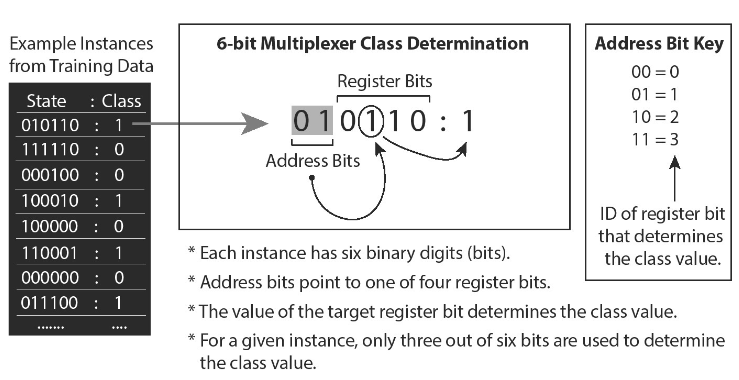

In the example in the picture above, it can be seen that the first, third, and fourth register bit don't actually provide any additional information as to what the classification is. The is where LCS makes use of an incredibly power tool, the "don't care" or # symbol. The don't care symbol allows the LCS to develop maximally accurate and maximally generic rules. The don't care symbol is also paramount for human readability and extracting relationships from datasets as it essentially strips away non-essential information. The don't care symbol can be likened to a weight of zero in a neural network. Because of this, the LCS can generate perfect or optimal rules that describe the dataset. For instance, the optimal rule for the above example would be [0, 1, #, 1, #, #]:1. For the 6-bit multiplexer problem, there are 8 optimal rules. Longer n-bit multiplexer problems have a greater number of optimal rules, but the number of optimal rules grows much, much slower than the number of possible rules (3^n) or unique training instances (2^n). Below is a table taken from the same source as above that shows the number of optimal rules for various n-bit multiplexer problems.

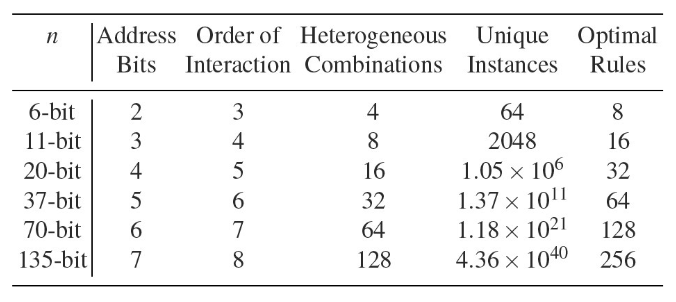

In 2015, Dr. Urbanowicz and his group "solved" the 135-bit multiplexer problem by having an LCS generate the 256 optimal rules from a training set that was considerably smaller than the number of unique instances. This showcased that LCS can learn generalized patterns in data without needing to see all possible formulations of the data. Obviously, this could have a profound impact on artificial intelligence as a whole by reducing the amount of training data needed to learn. Dr. Urbanowicz now uses his LCS to model bioinformatics and genome sequencing at Cedars-Sinai Medical Center.

The LCS developed below will follow a path needed to solve the 6-bit multiplexer problem in order to showcase the algorithm and how it works. The model produces a population that is a list of dictionaries where each dictionary is a classifier. Each classifier has a many key:value pairs that represent its state, action, accuracy, etc. Thus, the population as a whole can be modified by list methods, and classifier information can be retrieved by dictionary keys. Additionally, the "state" portion of the classifier is a list of tuples that represent (index, value) of the state. This means that only listed indices are important. All non-listed indices are equivalent to the "don't care" or # as is traditionally used in LCS algorithms. Removing the # symbol and shortening the rule list to only parameters that matter significantly speeds up computation time and reduces memory usage. This method of constructing the state is taken from Dr. Martin Butz's 2005 book cited above.

### Step 1: Initialize Setup

Initialize the population and create the functions for creating empty match sets and action sets:

In [1]:
# Initialize the empty population. This is only called once at the beginning of the cycle.
def initialize_population():
    population = []
    return population

population = initialize_population()
print(population)

[]


In [2]:
print(population)

[]


### Step 2: Feeding Data to LCS

LCS is an online learning mechanism, but will normally be trained from some dataset. Data from the dataset in training or from the environment in testing will need to be fed to the LCS. However, feeding one instance at a time is comparably to getting a single instance from the environment in an online learning setting anyway.

Also, note that the data is not shuffled or split into train and test sets just for simplicity purposes. The dataset is only 64 instances long and the LCS does not "memorize" the data like some machine learners do.

In [3]:

data = './6Multiplexer_Data_Complete.csv'

# Get the length of the file so that the get_instance function doesn't return anything if requested line is not present
def get_data_length(data):
    with open(data, 'r') as file:
        return sum(1 for row in file)

# Convert the instance into a list of integers
def convert_int(instance):
    int_instance = []
    for i in instance:
        int_instance.append(int(i))
    return int_instance

# Create a function that gets the data from a file an returns a specified instance of the dataset to the LCS
# This returns a single training instance from the data and does not load the entire data file into memory
def get_instance(data, line_num):
    import csv
    lines = get_data_length(data)
    with open(data, 'r') as source:
        reader = csv.reader(source)
        if line_num > lines:
            return
        for _ in range(line_num):
            next(reader)
        return convert_int(next(reader))

instance = get_instance(data, 1)
print(instance)

[0, 0, 0, 0, 0, 0, 0]


### Step 3: Determine if classifiers in population match the current instance

Compare each classifier in the population to the current instance. If classifiers in the population match, they are each added to the match set.

In [4]:
# Create a does_match function that compares each attribute between two classifiers
# The states of each classifier are tuples of (index, value). Only some indices are specified, if they are not, they are equivalent to the hash "don't care" symbol
def does_match(state, instance):
    for i in range(len(state)):
        index = state[i][0]
        if state[i][1] != instance[index]:
            return False
    return True

# Create the match set by comparing the attributes of each classifier in the population with the current instance
def create_match_set(population, instance):
    match_set = []
    if len(population) == 0:
        return match_set # Returns an empty patch set if the population length is zero, this is importance for covering
    else:
        for classifier in population:
            state = classifier['state']
            if does_match(state, instance) == True:
                match_set.append(classifier)
                classifier['match count'] += 1
                classifier['accuracy'] = classifier['correct count'] / classifier['match count']
                classifier['fitness'] = classifier['accuracy'] ** 5
        return match_set

match_set = create_match_set(population, instance)
print(population)
print(match_set)
# Test does_match function
x = [(0,0), (1,0), (5,1), (4, 1)]
y = [0, 0, 1, 1, 1, 1]
print(does_match(x, y))

[]
[]
True


### Step 4: Generate the correct set

From the match set, create a correct set by comparing the action or class of each classifier with the action or class of each instance.

In [5]:
# Create the correct set by comparing the class or action of each classifier in the match set with the current instance

def create_correct_set(match_set, instance):
    correct_set = []
    if len(match_set) == 0: # Similar to the match set, return an empty correct set if the match set is empty
        return correct_set
    else:
        for classifier in match_set:
            if classifier['action'] == instance[-1]: # This assumes that the classification is the last item in the training instance list. Most of the time this is the case
                correct_set.append(classifier)
                classifier['correct count'] +=1
                classifier['accuracy'] = classifier['correct count'] / classifier['match count']
                classifier['fitness'] = classifier['accuracy'] ** 5
        return correct_set
        
correct_set = create_correct_set(match_set, instance)
print(population)
print(correct_set)

[]
[]


### Step 5: Covering

In most LCS, the population is initialized as being empty. Covering adds classifiers to the population using the current instance if the correct set is empty. This is also the step that turns the simple instance data into the classifier dictionary.

In [6]:
# Create a dictionary item to represent the current instance if the correct set is empty.

def covering(instance, iteration, specificity):
    import random
    state = []
    action = instance[-1]
    for x in range(len(instance) - 1):
        if random.random() < specificity:
            state.append(tuple((x, instance[x])))
    classifier = {'state': state, 
                  'action': action, 
                  'numerosity': 1, 
                  'match count': 1, 
                  'correct count': 1, 
                  'accuracy': 1, 
                  'fitness': 1,
                  'deletion vote': 1, 
                  'birth iteration': iteration}
    return classifier

classifier = covering(instance, 1, specificity=.5)

def update_population(classifier, population):
    population.append(classifier)
    return population
update_population(classifier, population)
print(population)

[{'state': [(2, 0), (3, 0), (4, 0)], 'action': 0, 'numerosity': 1, 'match count': 1, 'correct count': 1, 'accuracy': 1, 'fitness': 1, 'deletion vote': 1, 'birth iteration': 1}]


### Step 5.1: Population Filling

Below is an example of a loop that goes through the training data and creates a population from the training instances. The loop takes a data set to train on and a specificity parameter that is from 0 to 1. A specificity of 1 means that the classifier states will be 100% specific and the population will essentially be filled with one of each iteration of the training data. Anything less than 1 and there is a chance that for each bit in the state of a calssifier it will be unspecified. This is equivalent to the # symbol in most LCS algorithms and if a bit is unspecified, the algorithm "doesn't care". The states are coded in a list of tuples that represent index-value pairs. For large datasets and complicated problems, this can have a significant speed and memory advantage over representing "don't care" bits with #.

In [7]:
def testing(data, specificity):
    population = initialize_population()
    length = get_data_length(data)
    for i in range(1, length):
        instance = get_instance(data, i)
        match_set = create_match_set(population, instance)
        correct_set = create_correct_set(match_set, instance)
        if len(correct_set) == 0:
            classifier = covering(instance, i, specificity=specificity)
            update_population(classifier, population)
    return population

### Step 6: Genetic Algorithm

The genetic algorithm is the heart of learning for the LCS. It introduces new rules to the population and evolves accurate, general rules that apply to the training data. The three main portions of the GA are selection, crossover, and mutation, applied in that order.

Selection selects two parent classifiers from the correct set. Selection is most often done in two ways, proportionate selection or tournament selection. Proportionate selection makes the most logical sense at first, but can significantly hinder learning performance. In proportionate selection parents are selected directly proporional to their fitness. However, it is often the case during training that many classifiers will have similar, low accuracy and few classifiers will have high accuracy. The chance of picking a highly accurate classifier at random is small. This is normally visualized with a roulette wheel. If the slices of a roulette wheel were represented by classifier accuracy, one, highly accurate classifer might take up 25% of the wheel while thousands of classifiers with poor accuracy would take up 75% of the wheel. Spinning the wheel to choose a classifier means that you'll pick an inaccurate classifier 75% of the time. There are ways around this like fitness sharing for proportionate selection, but tournament selection is simpler and will be used here. Tournament selection randomly selects a number of classifiers from the correct set. The classifier with the highest accuracy is chosen as a parent. This is repeated for the second parent.

Crossover exchanges attributes of the parent classifier states to create potentially new classifiers. The three main crossover mechanisms are uniform, single point, and double point crossover. Uniform goes one attribute at a time and randomly exchanges the values between the two parent classifiers. Uniform crossover introduces the most diversity into the population but has two major drawbacks. Uniform crossover not only significantly more difficult to perform (in terms of computations and even physically coding it) than the other two, it can disrupt learning significantly. For example, if two very accurate classifiers are chosen as parents, uniform crossover can completely disrupt their attributes into new classifiers that look nothing like the original parents. Thus, single point or double point crossover is traditionally used. Single point crossover chooses a random index in the parent classifiers and swaps them at that point. In this way, as least 50% of the parent classifier attributes are maintained in their original order while introducing attributes from the other parent classifier. Two point crossover does the samething as single point but chooses two indices and swaps the portion between those two points. In this method, at least 66% of the parent classifiers are preserved.

Mutation is applied to the offspring of the two parent classifiers. Mutation is based off a small probability that either converts a generalized attribute into a specified one or vice versa. If converting a generalized attribute to a spcified one, the specified attribute is made sure to match the current training instance.

Lastly, subsumption is checked to see if the parents are more general than their offspring. If so, the offspring are not added to the population and the numerosity of the subsuming parent is increased.

In [8]:
# Create a function that takes in a set, like the correct set, and selects two parent classifiers

def tournament_selection(correct_set, tournament_size):
    import random
    tournament = random.choices(correct_set, k=tournament_size)
    return tournament

# Create a function that selects a parent from the tournament

def parent_selection(tournament):
    max_fitness = 0
    parent_index = 0
    for i in tournament:
        if i['fitness'] > max_fitness:
            max_fitness = i['fitness']
            parent_index  = tournament.index(i)
    return tournament[parent_index]

### Step 6.1: Test tournament selection and parent selection

Create a test for the tournament selection and parent selection functions. Normally, the selection will only take place in the correct set. For testing sake, we apply it to the whole population.

In [9]:
population = testing(data, .5)
print(population)
print(len(population))

[{'state': [(0, 0), (1, 0), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 8, 'correct count': 4, 'accuracy': 0.5, 'fitness': 0.03125, 'deletion vote': 1, 'birth iteration': 1}, {'state': [(0, 0), (3, 0), (4, 0)], 'action': 0, 'numerosity': 1, 'match count': 7, 'correct count': 5, 'accuracy': 0.7142857142857143, 'fitness': 0.18593443208187066, 'deletion vote': 1, 'birth iteration': 2}, {'state': [(2, 0), (4, 1)], 'action': 0, 'numerosity': 1, 'match count': 15, 'correct count': 7, 'accuracy': 0.4666666666666667, 'fitness': 0.022132674897119342, 'deletion vote': 1, 'birth iteration': 4}, {'state': [(0, 0), (3, 1), (4, 0), (5, 1)], 'action': 0, 'numerosity': 1, 'match count': 4, 'correct count': 1, 'accuracy': 0.25, 'fitness': 0.0009765625, 'deletion vote': 1, 'birth iteration': 6}, {'state': [(0, 0), (1, 0), (3, 0), (5, 0)], 'action': 1, 'numerosity': 1, 'match count': 2, 'correct count': 2, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 9}, {'state': [(0

In [10]:
tournament1 = tournament_selection(population, round(len(population) / 5))
print(tournament1)
print(len(tournament1))

[{'state': [(3, 1), (5, 0)], 'action': 1, 'numerosity': 1, 'match count': 14, 'correct count': 8, 'accuracy': 0.5714285714285714, 'fitness': 0.06092699470458736, 'deletion vote': 1, 'birth iteration': 13}, {'state': [(0, 1), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 3, 'correct count': 3, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 59}, {'state': [(0, 0), (1, 0), (2, 1), (3, 0), (5, 1)], 'action': 1, 'numerosity': 1, 'match count': 2, 'correct count': 2, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 10}, {'state': [(0, 1), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 3, 'correct count': 3, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 59}]
4


In [11]:
parent1 = parent_selection(tournament1)
print(parent1)

{'state': [(0, 1), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 3, 'correct count': 3, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 59}


In [12]:
tournament2 = tournament_selection(population, round(len(population) / 5))
print(tournament2)
print(len(tournament2))

[{'state': [(1, 0), (5, 1)], 'action': 0, 'numerosity': 1, 'match count': 2, 'correct count': 1, 'accuracy': 0.5, 'fitness': 0.03125, 'deletion vote': 1, 'birth iteration': 46}, {'state': [(2, 0), (4, 1)], 'action': 0, 'numerosity': 1, 'match count': 15, 'correct count': 7, 'accuracy': 0.4666666666666667, 'fitness': 0.022132674897119342, 'deletion vote': 1, 'birth iteration': 4}, {'state': [(1, 0), (2, 1), (4, 0), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 2, 'correct count': 2, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 41}, {'state': [(2, 1)], 'action': 1, 'numerosity': 1, 'match count': 9, 'correct count': 5, 'accuracy': 0.5555555555555556, 'fitness': 0.05292214940134466, 'deletion vote': 1, 'birth iteration': 48}]
4


In [13]:
parent2 = parent_selection(tournament2)
print(parent1)
print(parent2)

{'state': [(0, 1), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 3, 'correct count': 3, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 59}
{'state': [(1, 0), (2, 1), (4, 0), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 2, 'correct count': 2, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 41}


### Step 6.2: Perform Crossover

Create a function that takes two parent classifiers and crosses over their attibutes using single point crossover.

In [14]:
def crossover(parent1, parent2, birth_iteration):
    import random
    parent1_attributes = parent1['state']
    parent2_attributes = parent2['state']
    action = parent1['action'] # Assumes that crossover only takes place on the correct set, thus both parents have the same action
    offspring1_attributes = []
    offspring2_attributes = []
    if len(parent1_attributes) == 0 and len(parent2_attributes) == 0:
        largest_index = 0
    elif len(parent1_attributes) == 0:
        largest_index = parent2_attributes[-1][0]
    elif len(parent2_attributes) == 0:
        largest_index = parent1_attributes[-1][0]
    elif parent1_attributes[-1][0] >= parent2_attributes[-1][0]:
        largest_index = parent1_attributes[-1][0]
    else:
        largest_index = parent2_attributes[-1][0]
    crossover_point = random.randint(0, (largest_index - 1)) if largest_index > 0 else 0 # Use largest index minus 1 or else there is no crossover if the point is equal to largest index
    # The 4 for loops seem excessive, but it keeps the attributes in order by index value
    for i in parent1_attributes:
        if i[0] <= crossover_point:
            offspring1_attributes.append(i)
    for i in parent2_attributes:
        if i[0] <= crossover_point:
            offspring2_attributes.append(i)
    for i in parent1_attributes:
        if i[0] > crossover_point:
            offspring2_attributes.append(i)
    for i in parent2_attributes:
        if i[0] > crossover_point:
            offspring1_attributes.append(i)
    offspring1 = {'state': offspring1_attributes, 
                    'action': action, 
                    'numerosity': 1, 
                    'match count': 1, 
                    'correct count': 1, 
                    'accuracy': 1, 
                    'fitness': 1,
                    'deletion vote': 1, 
                    'birth iteration': birth_iteration}
    offspring2 = {'state': offspring2_attributes, 
                'action': action, 
                'numerosity': 1, 
                'match count': 1, 
                'correct count': 1, 
                'accuracy': 1, 
                'fitness': 1,
                'deletion vote': 1, 
                'birth iteration': birth_iteration}


    return offspring1, offspring2

son, daughter = crossover(parent1, parent2, 1)

print(parent1)
print(parent2)
print(son)
print(daughter)


{'state': [(0, 1), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 3, 'correct count': 3, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 59}
{'state': [(1, 0), (2, 1), (4, 0), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 2, 'correct count': 2, 'accuracy': 1.0, 'fitness': 1.0, 'deletion vote': 1, 'birth iteration': 41}
{'state': [(0, 1), (1, 0), (2, 1), (4, 0), (5, 0)], 'action': 0, 'numerosity': 1, 'match count': 1, 'correct count': 1, 'accuracy': 1, 'fitness': 1, 'deletion vote': 1, 'birth iteration': 1}
{'state': [(5, 0)], 'action': 0, 'numerosity': 1, 'match count': 1, 'correct count': 1, 'accuracy': 1, 'fitness': 1, 'deletion vote': 1, 'birth iteration': 1}


### Step 6.3: Mutation

Mutation randomly switches a defined attribute to undefined or an undefined attribute to defined that matches the current training instance.

In [15]:
def mutation(classifier, instance, rate):
    import random
    half_rate = rate / 2 # Split the mutation rate in half to determine if deleting an attribute or adding one. Thus, mutation only happens once for each attribute
    index = 0
    for j in range(len(instance) -1 ):
        rand = random.random()
        if rand >= half_rate and rand <= rate and (index, instance[j]) not in classifier['state']: # Checks to make sure that instance isn't already in the state, preventing duplicates
            classifier['state'].append((index, instance[j]))
        index += 1
    #classifier['state'] = list(set(classifier['state'])) # Turns the state into a set and removes duplicates.
    for i in classifier['state'][:]:
        rand = random.random()
        if rand < half_rate: # Rate divided by two to differentiate between deletion and specialization of attributes
            classifier['state'].remove(i) #randomly delete the specified attribute from the classifier state
    classifier['state'].sort() # Sorts the tuples by index, making sure that they are always in order.
    return classifier

mutated = mutation(daughter, instance, .5)

print(mutated)
            


{'state': [(5, 0)], 'action': 0, 'numerosity': 1, 'match count': 1, 'correct count': 1, 'accuracy': 1, 'fitness': 1, 'deletion vote': 1, 'birth iteration': 1}


### Step 6.4: Subsumption

Subsumption can either take place before the genetic algorithm, acting on the correct set, or it can take place only on the children of the genetic algorithm. XCS uses a toggle parameter that can choose to run correct set (action set) subsumption or not, but XCS always checks for subsumption on the children of the genetic algorthim. For simplicity's sake, only the GA subsumption will be used here. Correct set subsumption is relatively computationally intensive as it checks all classifiers against all other classifiers. For large populations and correct sets, this can take a while.

Correct set subsumption checks to see if a classifier is more general and at least as accurate as another classifier. If it is, the, the numerosity of the more general classifier is increased by one and the less general classifier is deleted from the population.

GA subsumption simply checks to see of the parent classifiers are more general than their children. If they are, their numerosity is is increased and the children are simply not added to the population. The numerosity is directly increased on the classifier in the population.

*Note: Total population subsumption needs to be checked with the offspring as it is possible that the child already exists in the population, but was not part of the match set or correct set and then the genetic algorithm can produce an equivalent offspring to a classifier that is already in the population. This creates multiple classifiers with the same state and action.

**Note: Although other researchers and their algorithms suggest that population subsumption is not necessary, it seems to be required to eliminate more specific rules. An alternative could be to alter the fitness function to that it takes into account spcificity.

In [16]:
import copy
def more_general(parent, offspring):
    for i in parent['state']:
        if i not in offspring['state']: # Simply checks to see if the parent has fewer specified attributes than the child, as long as the specified ones are in the child
            return False
    return True

def subsumption(classifier, population):
    for i in population: # Do you need to loop through the whole population here? Or can you just update the parent parameters
        if i['state'] == classifier['state'] and i['action'] == classifier['action']:
            i['numerosity'] += 1
            #i['deletion vote'] = i['numerosity'] / i['fitness']
            i['deletion vote'] = 1 / i['fitness']
    return
# Check to see if the offspring is already in the population
def already_in(offspring, population):
    for i in population:
        if i['state'] == offspring['state'] and i['action'] == offspring['action']:
            return True
    return False

# Create a function to do correct set subsumption
def set_subsumption(population):
    population_copy = copy.deepcopy(population)
    for i in population_copy:
        for j in population_copy:
            if more_general(i, j) and i['state'] != j['state'] and i['accuracy'] >= j['accuracy']:
                i['numerosity'] += j['numerosity']
                if j in population:
                    population.remove(j)
    return             



x = {'state': [(0, 0), (1, 1), (4, 1),], 'action': 1, 'numerosity': 1, 'match count': 1, 'correct count': 1, 'accuracy': 1, 'fitness': 1, 'deletion vote': 1, 'birth iteration': 1}
y = {'state': [(0, 0), (1, 1), (4, 1)], 'action': 1, 'numerosity': 1, 'match count': 1, 'correct count': 1, 'accuracy': 1, 'fitness': 1, 'deletion vote': 1, 'birth iteration': 1}
print(more_general(x, y))

True



### Step 6.5: Combine GA Parts

Lastly, we can combine all the GA parts into one function

In [17]:
def genetic_algorithm(population, correct_set, tournament_size_fraction, mutation_rate, training_instance, birth_iteration):
    import math
    # Create tournaments from correct set with size equal to a percentage of the correct set size
    tournament1 = tournament_selection(correct_set, math.ceil(tournament_size_fraction * len(correct_set))) # Rounds the tournament size up to a whole number if the correct set is small
    tournament2 = tournament_selection(correct_set, math.ceil(tournament_size_fraction * len(correct_set)))
    # Select parents from the two tournaments
    parent1 = parent_selection(tournament1)
    parent2 = parent_selection(tournament2)
    # Cross over the parents and produce two offspring
    offspring1, offspring2 = crossover(parent1, parent2, birth_iteration)
    # Mutate the offspring based off the mutation rate
    offspring1 = mutation(offspring1, training_instance, mutation_rate)
    offspring2 = mutation(offspring2, training_instance, mutation_rate)
    # Check if each parent is more general than each child, if so, subsume the child
    if more_general(parent1, offspring1):
        subsumption(parent1, population)
    elif more_general(parent2, offspring1):
        subsumption(parent2, population)
    elif already_in(offspring1,population):
        subsumption(offspring1, population)
    else: # If the child is not subsumed by either parent, and not already in the population add it to the population
        population.append(offspring1)
    if more_general(parent1, offspring2):
        subsumption(parent1, population)
    elif more_general(parent2, offspring2):
        subsumption(parent2, population)
    elif already_in(offspring2, population):
        subsumption(offspring2, population)
    else:
        population.append(offspring2)
    return
    

### Step 7: Deletion

The final step in the LCS algorithm is to delete classifiers from the population if the total numerosity is greater than some specified number. Classifiers are deleted from the population inversely proportional to their fitness. When a classifier is "deleted", its numerosity is reduced by 1. If a classifier's numerosity is ever dropped to zero, it is removed entirely from the population. Lastly, some LCS systems have added protection mechanisms for young classifiers so that classifiers can't be deleted right after they are born. However, since classifiers here are initialized with a numerosity and fitness of 1, they will always be the least likely to be deleted.

*Note: For most problems deletion vote based on numerosity/fitness makes sense since it keeps a few rules from taking over the population. However, sometimes the "correct" answer to a problems is only a few rules. For example, the 6 bit multiplexer problem has hundreds of potential rules (3^6 times 2), but only 8 optimal rules. In this case, the LCS should try to find only 8 optimal rules with high numerosity.

In [18]:
def deletion(population, max_size):
    cumulative_numerosity = 0
    for i in population: # Loop through the population and sum all the numerosities
        cumulative_numerosity += i['numerosity']
    if cumulative_numerosity <= max_size:
        return # if the cumulative numerosity is less than the allowable size, then no deletion occurs
    while cumulative_numerosity > max_size: # Continue deletion until the cumulative numerosity is less than or equal to the max size
        population.sort(key=lambda d: d['deletion vote'], reverse=True) # Sort the population based off deletion vote, the highest will be at the front
        if population[0]['numerosity'] > 1: # If the numerosity of the highest voted classifier is greater than 1, decrease its numerosity by 1
            population[0]['numerosity'] -= 1
            #population[0]['deletion vote'] = population[0]['numerosity'] / population[0]['fitness'] #Update the deletion vote of the first classifier
            population[0]['deletion vote'] = 1 / population[0]['fitness']
        else:
            population.pop(0) # If the numerosity is 1, simply remove the classifier from the population
        cumulative_numerosity = 0 # Reset the cumulative numerosity to 0
        for i in population:
            cumulative_numerosity += i['numerosity'] # Calculate the cumulative numerosity again and loop back up to the while loop
    return


### Step 8: Compaction

The last and final step of an LCS is to compact the population into a set of rules that can be used for testing. Compaction simply deletes inaccurate rules that will inevitably be generated during that last few training cycles. The deletion criteria can be highly elitist and can delete rules with an accuracy lower than a specified value. For simple problems, this might even be set to 1.

In [19]:
# This should be a simple function, but for some reason, seems to do nothing

def compaction(population, accuracy_cutoff):
    for i in population[:]: # Apparently this slice is important to make a copy of the population and remove its items while iterating over it
        if i['accuracy'] < accuracy_cutoff:
            population.remove(i)
    set_subsumption(population)
    return

### Step 9: Combine all Parts of the LCS Algorithm

Finally, we can combine all steps of the LCS algorithm together.

In [20]:
def binaryLCS(data, covering_specificity, tournament_size_fraction, mutation_rate, max_pop_size, accuracy_cutoff, learning_epochs):
    learning_epoch = 1 # Initialize the learning epoch
    population = initialize_population() # Create an empty population
    length = get_data_length(data) # Get the length of the training data file
    birth_iteration = 1 # Initialize the birth iteration
    while learning_epoch < learning_epochs: # Continue the training loop for as many epochs as requested
        for i in range(1, length): # Starting at line 1 assumes that the first line is the header
            instance = get_instance(data, i) # Get the first training instance from the data
            match_set = create_match_set(population, instance) # Create the match set from the population and the training instance
            correct_set = create_correct_set(match_set, instance) # Create the correct set from the match set and the training instance
            if len(correct_set) == 0: # Activate covering if the correct set is empty
                classifier = covering(instance, birth_iteration, covering_specificity) # Create a new classifier that matches the current training instance
                population.append(classifier) # add the new classifier to the population
                birth_iteration += 1
            else:
                set_subsumption(correct_set)
                # If the correct set is not empty, activate the genetic algorithm
                genetic_algorithm(population, correct_set, tournament_size_fraction, mutation_rate, instance, birth_iteration)
                birth_iteration += 1    
        #population_subsumption(population)
        deletion(population, max_pop_size)
        learning_epoch += 1
    compaction(population, accuracy_cutoff)
    return population

In [21]:
import pprint
learning_cycles = 1000
population_size = 10000
rule_set = binaryLCS(data, .5, .5, .2, population_size, 1.0, learning_cycles)
pprint.pprint(rule_set)

[{'accuracy': 1.0,
  'action': 0,
  'birth iteration': 29435,
  'correct count': 4313,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 4313,
  'numerosity': 1141,
  'state': [(1, 1), (3, 0), (5, 0)]},
 {'accuracy': 1.0,
  'action': 1,
  'birth iteration': 29598,
  'correct count': 2146,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 2146,
  'numerosity': 35,
  'state': [(0, 0), (2, 1), (3, 1), (5, 1)]},
 {'accuracy': 1.0,
  'action': 0,
  'birth iteration': 31449,
  'correct count': 4060,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 4060,
  'numerosity': 984,
  'state': [(0, 0), (1, 1), (3, 0)]},
 {'accuracy': 1.0,
  'action': 0,
  'birth iteration': 32485,
  'correct count': 1966,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 1966,
  'numerosity': 4,
  'state': [(0, 1), (1, 0), (2, 0), (4, 0)]},
 {'accuracy': 1.0,
  'action': 0,
  'birth iteration': 34105,
  'correct count': 3732,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match coun

### Step 10: Testing

Use the ruleset to test on the data and see how well the rule set predicts the classifications of the data.

In [22]:
def model_prediction_accuracy(rule_set, data):
    if len(rule_set) == 0:
        return None
    length = get_data_length(data)
    number_correct = 0
    for i in range(1, length):
        instance = get_instance(data, i)
        match_set = create_match_set(rule_set, instance)
        vote1 = sum(j['numerosity'] for j in match_set if j['action'] == 0)
        vote2 = sum(k['numerosity'] for k in match_set if k['action'] == 1)
        if vote1 > vote2:
            vote = 0
        if vote2 > vote1:
            vote = 1
        if vote == instance[-1]:
            number_correct += 1
    percent_correct = number_correct / (length - 1)
    return percent_correct

print(model_prediction_accuracy(rule_set, data))

1.0


### Step 11: Information Extraction

In order to aid in the transparency of the generated ruleset, the rules can be sorted by how often they are correct compared to how many training iterations they saw. This will essentially normalize the relative importance of rules as sometimes a rule that is born very early on in the training only has such a high correct count or numerosity because it has simply seen more training instances than better rules.

In [23]:
length = get_data_length(data='./6Multiplexer_Data_Complete.csv')
sorted_rules = sorted(rule_set, key=lambda d: (d['correct count'] / ((length * learning_cycles) - d['birth iteration'])), reverse=True)
pprint.pprint(sorted_rules)

[{'accuracy': 0.9981485767183522,
  'action': 0,
  'birth iteration': 29435,
  'correct count': 4313,
  'deletion vote': 1.0,
  'fitness': 0.9907770978696677,
  'match count': 4321,
  'numerosity': 1141,
  'state': [(1, 1), (3, 0), (5, 0)]},
 {'accuracy': 0.9980334316617503,
  'action': 0,
  'birth iteration': 31449,
  'correct count': 4060,
  'deletion vote': 1.0,
  'fitness': 0.9902057562389082,
  'match count': 4068,
  'numerosity': 984,
  'state': [(0, 0), (1, 1), (3, 0)]},
 {'accuracy': 0.9978609625668449,
  'action': 0,
  'birth iteration': 34105,
  'correct count': 3732,
  'deletion vote': 1.0,
  'fitness': 0.9893504698790048,
  'match count': 3740,
  'numerosity': 1102,
  'state': [(0, 1), (1, 1), (5, 0)]},
 {'accuracy': 0.9977814753189129,
  'action': 0,
  'birth iteration': 35177,
  'correct count': 3598,
  'deletion vote': 1.0,
  'fitness': 0.9889564860407438,
  'match count': 3606,
  'numerosity': 863,
  'state': [(0, 1), (4, 0), (5, 0)]},
 {'accuracy': 0.9975713418336369,


#### Optimal Rules

However, due to the random nature of the algorithm, not all of the 8 optimal rules are evolved each time. To remedy this, the LCS itself can be run multiple times and the most frequently generated rules will tend to be the optimal rules. This is different than simply running the same LCS for more iterations or with different parameters as the population is still only initialized one time. To glean the most information out of the ruleset, the LCS can be run multiple times with the same parameters, resetting the population each time, and keeping track of the most frequently generated rules.

For instance, here are the results of the most frequently generated rules from running the same LCS multiple times:

{'accuracy': 1.0,
  'action': 1,
  'birth iteration': 26467,
  'correct count': 4688,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 4688,
  'numerosity': 92,
  'state': [(0, 1), (1, 0), (4, 1)]}

{'accuracy': 1.0,
  'action': 1,
  'birth iteration': 28792,
  'correct count': 4397,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 4397,
  'numerosity': 1490,
  'state': [(0, 1), (1, 1), (5, 1)]}

{'accuracy': 1.0,
  'action': 0,
  'birth iteration': 30279,
  'correct count': 4202,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 4202,
  'numerosity': 919,
  'state': [(0, 0), (1, 0), (2, 0)]}

{'accuracy': 1.0,
  'action': 1,
  'birth iteration': 33676,
  'correct count': 3781,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 3781,
  'numerosity': 992,
  'state': [(0, 0), (1, 0), (2, 1)]}

{'accuracy': 1.0,
  'action': 0,
  'birth iteration': 34541,
  'correct count': 3674,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 3674,
  'numerosity': 1062,
  'state': [(0, 1), (1, 0), (4, 0)]}

{'accuracy': 1.0,
  'action': 0,
  'birth iteration': 32529,
  'correct count': 3928,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 3928,
  'numerosity': 1035,
  'state': [(0, 0), (1, 1), (3, 0)]}

{'accuracy': 1.0,
  'action': 0,
  'birth iteration': 39031,
  'correct count': 3117,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 3117,
  'numerosity': 819,
  'state': [(0, 1), (1, 1), (5, 0)]}

{'accuracy': 1.0,
  'action': 1,
  'birth iteration': 33374,
  'correct count': 3819,
  'deletion vote': 1.0,
  'fitness': 1.0,
  'match count': 3819,
  'numerosity': 1228,
  'state': [(0, 0), (1, 1), (3, 1)]}

The dictionaries of the classifiers above might be a bit confusing at first, but the parts that matter are the state and the action. To reiterate, the state is a list of tuples in the form of (index, value) where the index corresponds to the index in the list of the input instance. Thus, (0, 1) would mean that the value at the 0th index is equal to 1. Any index that is not listed is equivalent to the don't care operator, the # symbol. Thus, the 8 optimal rules are then:

1. "[0, 0, 0, #, #, #]: 0"
2. "[0, 0, 1, #, #, #]: 1"
3. "[0, 1, #, 0, #, #]: 0"
4. "[0, 1, #, 1, #, #]: 1"
5. "[1, 0, #, #, 0, #]: 0"
6. "[1, 0, #, #, 1, #]: 1"
7. "[1, 1, #, #, #, 0]: 0"
8. "[1, 1, #, #, #, 1]: 1"

Translated into "if, then" structure, these would be:

1. If the first bit is 0 and the second bit is 0 and the third bit is 0, then the classification is 0.
2. If the first bit is 0 and the second bit is 0 and the third bit is 1, then the classification is 1.
3. If the first bit is 0 and the second bit is 1 and the fourth bit is 0, then the classification is 0.
4. If the first bit is 0 and the second bit is 1 and the fourth bit is 1, then the classificaiton is 1.
5. If the first bit is 1 and the second bit is 0 and the fifth bit is 0, then the classification is 0.
6. If the first bit is 1 and the second bit is 0 and the fifth bit is 1, then the classification is 1.
7. If the first bit is 1 and the second bit is 1 and the sixth bit is 0, then the classification is 0.
8. If the first bit is 1 and the second bit is 1 and the sixth bit is 1, then the classification is 1.


Even without knowing the structure of the optimal rules ahead of time, or that there even were optimal rules, the 8 classifiers listed above keep being generated consitently with high accuracy and correct count every time the LCS is run. From here a human can read the ruleset and notice that the first and second bit are always specified in accurate rules, that only one other bit matters, and the value of that bit is always equal to the action. Granted, it does take the human to make a small logical step to realize that the first two bits create a binary number that "points" to the index of the third bit where its index is related to its position in the register bits, but this is certainly leaps and bounds easier than analyzing weights and biases in neural networks.

#### Product:

With the above as an example, one could imagine a product where users can upload their data for classification or machine learning and the LCS product would not only return classification, function approximation, image learning, etc., but it would also report back to the user the "if, then" list and showcase how it came to those classification conclusions, providing insight into the users data that they did not have before.

### Step 11: Compare to UrbsLab eLCS and XCS

Just for comparison, we can compare the above LCS to the scikit-learn implementations of eLCS and XCS created by Dr. Urbanowicz and his group. XCS is a significantly more advanced version of an LCS that uses reinforcement learning to approximate a function that resembles the Q-table.

It can be seen that the scikit-learn packages produce lower accuracy than the from scratch model (.7-.9 vs 1.0). However, the scikit-learn versions run significantly faster, taking mere seconds compared to minutes. This is attributed to the scikit-learn versions using numpy and other python modules that are actually written in C, and inefficient implementation various functions in the from scratch version.

The accuracy problem of the scikit-learn versions is a known one. The packages are currently "still under development" even though their last commit was two years ago. However, this means that there are currently no known LCS packages that are being maintained or expanded upon.

In [24]:
#Import Necessary Packages/Modules
from skeLCS import eLCS
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

#Load Data Using Pandas
data = pd.read_csv('./6Multiplexer_Data_Complete.csv') #REPLACE with your own dataset .csv filename
classLabel = 'Class'
dataFeatures = data.drop(classLabel,axis=1).values #DEFINE classLabel variable as the Str at the top of your dataset's class column
dataPhenotypes = data[classLabel].values

#Shuffle Data Before CV
formatted = np.insert(dataFeatures,dataFeatures.shape[1],dataPhenotypes,1)
np.random.shuffle(formatted)
dataFeatures = np.delete(formatted,-1,axis=1)
dataPhenotypes = formatted[:,-1]

#Initialize eLCS Model
model = eLCS(learning_iterations = 5000)

#3-fold CV
print(np.mean(cross_val_score(model,dataFeatures,dataPhenotypes,cv=3)))


0.7545454545454545


In [25]:
#Import Necessary Packages/Modules
from skXCS import XCS
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score

#Load Data Using Pandas
data = pd.read_csv('./6Multiplexer_Data_Complete.csv') #REPLACE with your own dataset .csv filename
dataFeatures = data.drop('Class',axis=1).values #DEFINE actionLabel variable as the Str at the top of your dataset's action column
dataActions = data['Class'].values

#Shuffle Data Before CV
formatted = np.insert(dataFeatures,dataFeatures.shape[1],dataActions,1)
np.random.shuffle(formatted)
dataFeatures = np.delete(formatted,-1,axis=1)
dataActions = formatted[:,-1]

#Initialize XCS Model
model = XCS(learning_iterations = 5000)

#3-fold CV
print(np.mean(cross_val_score(model,dataFeatures,dataActions,cv=3)))

0.8303030303030304


## Where to Go from Here?

Hopefully, it has been demonstrated that Learning Classifier Systems are an interesting and unique machine learning paradigm whose greatest strength is the development of transparent rulesets for human interpretation. Even though only a basic example problem was showcased here, LCS have nearly limitless applications and possibilities. This is especially true when expanding the functionality of the algorithm, which has been done many times in the past, but often for very specific problem domains. No, one group has developed general LCS tools for applications outside of their niche academic circles.

### Expansions:

#### 1. Real-Valued Data and Classifications

Obviously, the application of LCS algorithms would be incredibly limited if they could only handle binary data and binary classifications. Thus, researchers like Dr. Martin Butz have expanded LCS (in the form of XCS) to handle real-valued data. This is done by using hyperellipsoids as the ruleset. Essentially, the ruleset consists of centerpoints of an n-dimensional ellipsoid and the range of that dimension. The evolved centerpoint is essentially an average of the value n, learned from the data. The range then determines how important that value n is in correctly classifying the function. If the value n is very important or essential, the range of n will be very small. If n does not matter at all, the range will essentially be infinite and n will be equivalent to the "don't care" symbol in that dimension. This method has been shown to be very accurate in complex function approximation on functions of many dimensions.

#### 2. Reinforcement Learning

Another expansion of the LCS algorithm done by Butz was to add reinforcment learning to it. Here, the accuracy-based, real-valued LCS known as XCS simply uses its function approximation capabilities to approximate a function that adequately represents the q-table of state-action-rewards. This version of LCS has successfully solved puzzles, mazes, and played games.

#### 3. Anticipation

A very interesting expansion of LCS is the addition of a third parameter to the traditional "condition, action" ("if, then") ruleset structure. Researchers in the late 1990's and early 2000's created what is known as anticipatory classifier systems (ACS) by making the ruleset take the form of "condition, action, effect". This means that the LCS algorithm can now learn from its own actions and how they impact the environment. This is equivalent to a chess bot trying to predict the series of moves in a chain after it makes its own move.

#### 4. Hierarchical Learning

Something that has been suggested, but not implemented for LCS algorithms is a generic form of hierarchical learning. Because LCS are so relatively undeveloped and underutilized, they have not been applied in more general situations where piece-wise learning is applicable. For instance, this would be equivalent to having an LCS learn letters, then words, then phrases, then sentences, as is done with most natural language models. The same pattern could be developed for image recognition.

#### 5. Internal "Message List"

John Holland's original formulation of Cognitive System 1 included what he called a message list. This message list was essentially an internal storage of rules that could influence the the current state of the LCS. This allowed the system to "think" and its thoughts could influence its actions. The message list basically made the system "self-aware". Many cognitive scientist believe that this sort of internal loop or recursion is the key to consciousness. The internal message list was removed and never reimplemented as it provides little benefit for  machine learnings tasks, the main focus of LCS algorithms since the 1980's.

#### 6. Quantum LCS

An entirely new expansion for LCS could be that of running the algorithm on a quantum computer. The relatively small amount of math, simple structure, and inherent "don't care" symbol of LCS make them uniquely suited for quantum computers. As discussed above, traditional LCS use the ternary alphabet of 0, 1, and # or "don't care". This alphabet is a one-to-one match of the possible states of q-bits, with the # symbol simply being equal to a q-bit in superposition. Additionally, the inherent parallelization of the ruleset and the voting scheme for classification are already similar to how a quantum computer operates. Lastly, expanding LCS to the quantum realm has an interesting implication when combined with the message list expansion above. Some cognitive scientists believe that consciousness is an inherently quantum effect where conscious observers cause a wave function collapse on their own electrons in the brain in the form of a feedback loop of "self measurement". The message list implementation above would cause this same thing to happen if the LCS were to be run on a quantum computer.

### Applications:

While the applications of a generic machine learner like LCS are endless, below are a few key examples where LCS might be applied.

#### 1. General Classification

As with all machine learners or classifiers, LCS is broadly applicable to classification problems for datasets like many of those found on Kaggle.

#### 2. Machine Learning in Sensitive Industries

Since LCS are transparent in their rulesets, the most readily applicable applications are in industries where knowing exactly what is going on "under the hood" is important. Some examples are medical diagnosis based off symptoms, optimizing nuclear reactor performance and fuel lifetime, and portfolio management and quantitative trading in the financial sector.

#### 2. Data Mining and Knowledge Extraction

Similar to classification and general machine learning, LCS can be applied to data mining specifically for knowledge extraction. LCS could shed light on patterns in data that were entirely unknown before.

#### 3. Image Recognition

Although image recognition definitely falls under multiple of the above categories, LCS unique take on image recognition is worth pointing out. LCS is unlike neural networks or adversarial where the convolutions of the image obscure how the neural network is actually recognizing the image (an adversarial neural network convinced another neural network that an image of a bus was really an image of an ostrich all the while making changes undetectable to the human eye). Meanwhile, the don't care symbol in LCS can allow for the learned patterns and rules to be readily viewable by a human. This would be most easily showcased by an example from the MNIST dataset. Although actually running the LCS on the MNIST data set is beyond the scope of this work, one can imagine how an optimal rule for a hand drawn nine might look through the "eyes" of an LCS:

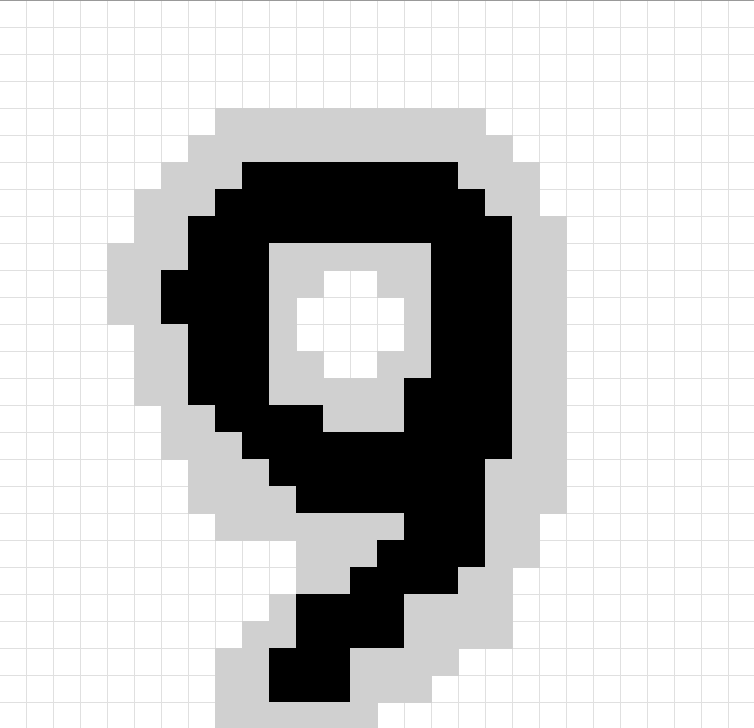

One can imagine that the light grey squares would be the "don't care" symbol with the black squares being 1 and the white squares being 0. This make sense for an optimal rule for a nine as the LCS would be able to classify anything with a general shape of a nine while excluding anything else.

#### 4. Autonomous Control

Given that LCS interact with an environment to get their training and learning instances, are an online learning systems, and that they can take in sensory input to determine actions, they are perfectly suited for autonomous control of robots, vehicles, chatbots, and many others.

#### 5. Mental Model Simulations

Lastly, because LCS were originally developed to mimic how the human brain thinks, they can be used to model thought processes and cognition. In fact, John Holland an others published a book called "Induction: Processes of Inference, Learning, and Discovery" in 1989 where they postulate that inductive reasoning is the main hurdle standing in the way of human level artificial intelligence. They propose a machine learner similar to LCS or CS1 that develops inductive reasoning by traversing a large network of concepts. The network they propose is that of Scott Fahlman and is called NETL: A System for Representing and Using Real-World Knowledge. Fahlman proposes a method of correlating short term computer RAM and long term HDD storage to short term and long term memory in humans. His network consists of millions of concepts with pointers to memory addresses of related concepts. This is similar to WordNet, but less focused on the grammatics. If a concept is active, it is loaded into RAM along with its pointers to related concepts that remain on the hard drive. If another concept is then brought into RAM, its pointers might point to something that the first concept pointed to. This would then signal the third concept to be brought from storage to RAM and the cycle continues indefinitely. Fahlman likens this to human memory where thoughs at the forefront of the mind are active in short term memory, but can easily trigger other concepts to be brought out of long term memory. 

Holland et al. note that an LCS-like system with "if, then" rulesets is the perfect mechanism for traversing this type of network. For instance, an LCS could have visual sensors that trigger the color pink. The concept of "pink" would then be loaded into RAM along with pointers to all its related topics. Say then that the auditory sensors of the LCS picked up a sound that sort of sounds like a duck or a bird. "Bird" then gets loaded into RAM and it shares a pointer with "pink", that pointer is loaded into RAM and the concept of "flamingo" is now at the forefront of the LCS and the cycle continues. The LCS can essentially employ inductive reasoning to guess that it is in the presenece of a flamingo without ever explicitely being trained on what a flamingo looks like, all that is needed is that a flamingo is known to be pink, they are birds, and having heard what some birds sounds like. Even training and learning can follow the same network structure, building the network up from experience and interaction with the environment.

Holland et al. thus propose that human cognition is an intricate collection of "if, and, or, else, and then" statements accompanied by a network or knowledge base learned through experience. This is equivalent to Ray Kurzweil's "Pattern Recognition Theory of Mind" and Butz's PAC lernability and disjunctive normal form that he uses to analyze XCS. Holland's proposal suggests that the human mind is a complex adaptive system, but that LCS type algorithms are uniquely suited to model such a system.

### Development Plan

Although Learning Classifier Systems are almost 50-years old now, they are still in there infancy in terms of development and their capabilities. Luckily, successful machine learning development pathways have already been laid out by companies like OpenAI and their development of deep neural newtorks. With the right funding and team, Learning Classifier Systems could follow a similar development pathway: from basic classification , to image recognition,  to game playing and reinforcement learning, to natural language processing, to robotic control and autonomous vehicles, and eventually cognitive artificial intelligence.